# Convolutional Neural Network (CNN)
## QTM 347 Final Project
### Jaejun Kim

## Introduction

In this project, we will introduce the basic neural network structure and Convolutional Neural Networks (CNNs). Then we will use the CNN on the MNIST data for image classification and compare it with other algorithms such as ensemble tree models and support vector machines.

### What is Neural Network?

Neural Network is a machine learning algorithm that tries to mimic the human brain. It is composed of multiple layers, an input layer, hidden layers, and an output layer. Each layer has multiple neurons. Each neuron receives values from the previous layer and produces output values. Neurons work as functions, and the functions are called activation functions. The activation functions are assigned random weights. The output values from the functions are called activation values. Then, these activation values are fed to the next layer. This process is called forward propagation. To reduce the error, the algorithm does backpropagation and adjusts the weights in activation functions.

Let's start with a single layer neural network model. The model has the form:

\begin{align}
  f(X) &= β_0 + Σ^K_{k+1} β_k h_k(X)  \\
  & = β_0 + Σ^K_{k+1} β_k g(w_{k0} + Σ^p_{j=1} w_{kj}X_j)
\end{align}

(James et al., 2021)

where $ X = (X_1, X_2, X_3, ... , X_p) $ indicate a vector of pedictors and are located in the input layer. $β_0$ denotes the intercept, and w denotes a matrix of weights assigned between every two neurons.

The hidden layer consists of K activations, which are results of applying nonlinear activation functions to the weighted sum of the inputs, expressed as:

\begin{align}
  A_k = h_k(X) = g(w_{k0} + Σ^p_{j=1} w_{kj}X_j)
\end{align}

(James et al., 2021)

After the activations $A_k$ are computed, the function $f(X)$ in the output layer takes $A_k$ as inputs and produces the outcomes Y. 

The following is a demonstration of a single layer neural network model.

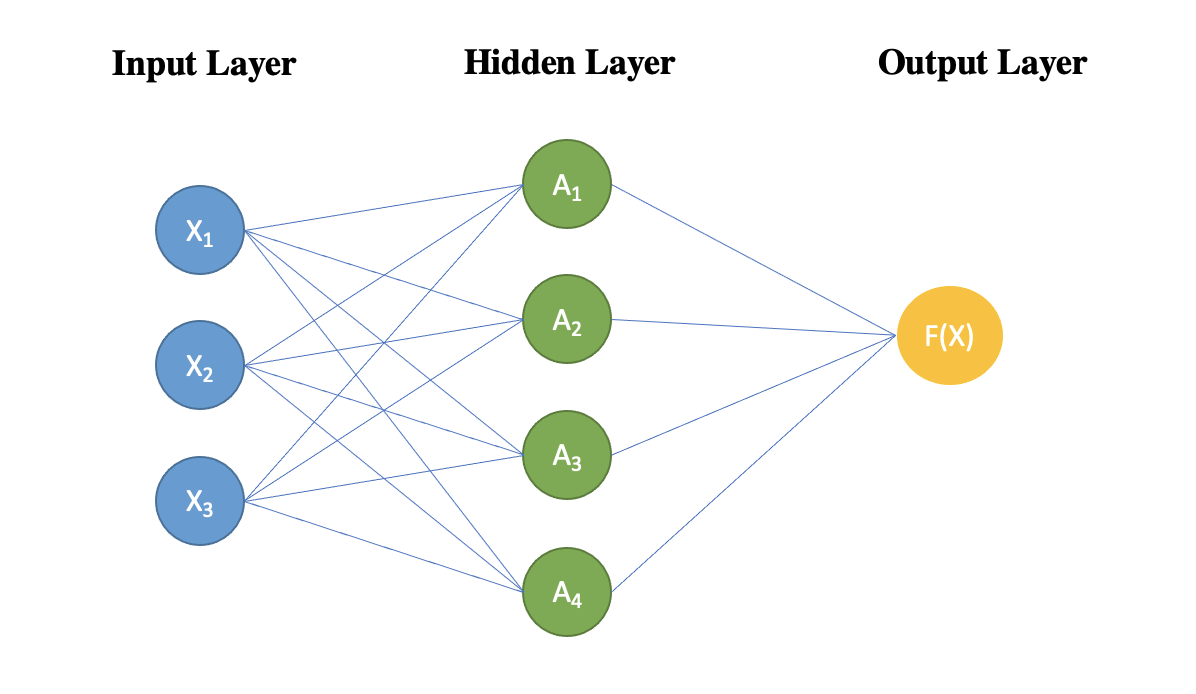

A multilayer neural network model is more commonly used than a single layer model and, instead, has additional hidden layers. Starting from the second layer, each layer takes the activations from the previous layer as inputs and computes new activations. 

For example, the new activations in the second hidden layer are generated based on the first layer, expressed as:

\begin{align}
  A_l^{(2)} = h_l^{(2)}(X) = g(w_{l0}^{(2)} + Σ^{K_1}_{k=1} w_{lk}^{(2)}A_k^{(1)})
\end{align} 

(James et al., 2021)


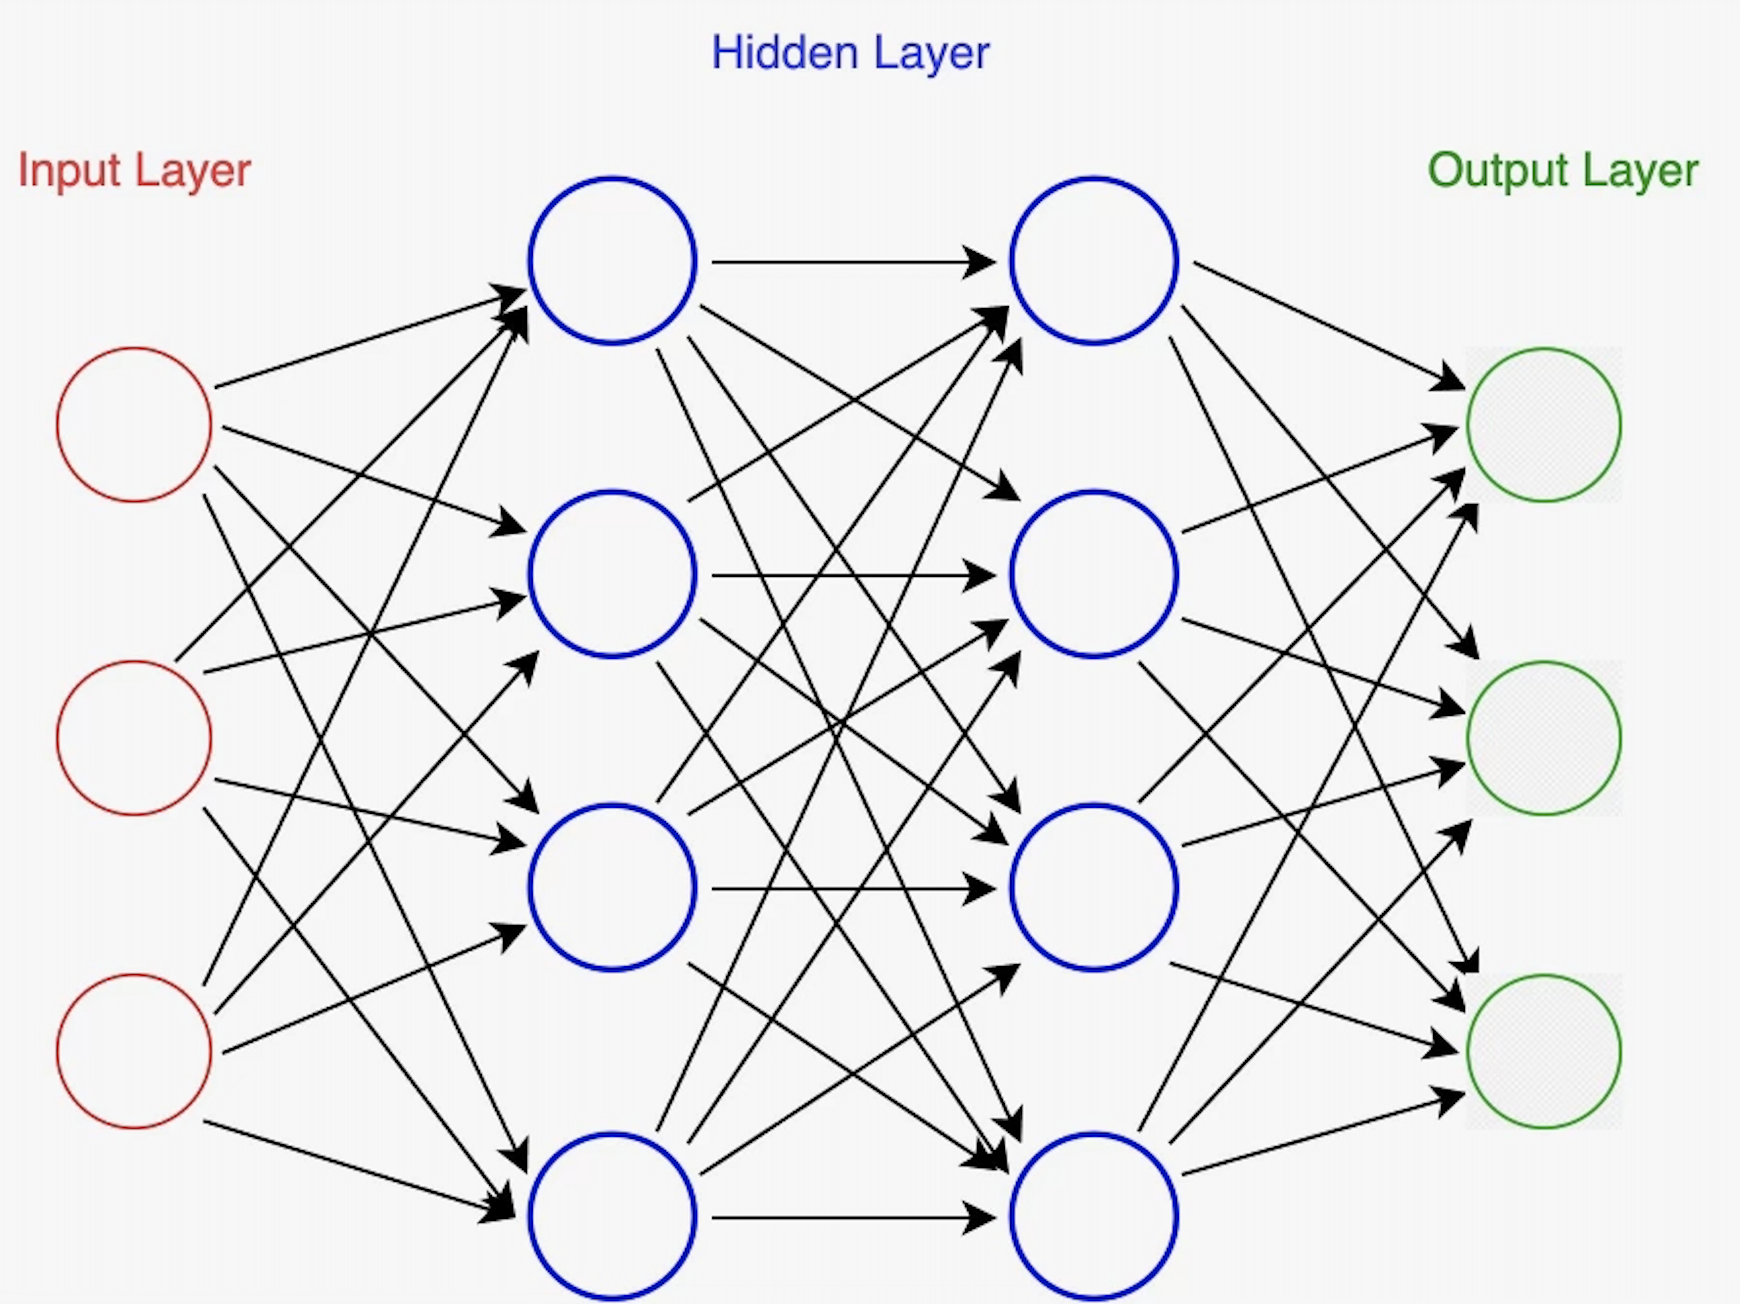

With more hidden layers, the multilayer neural network can approximate functions that are more complex. The reason is that deeper layers provide a more complex combination of input features, and a larger compositions of activation functions add an higher nonlinearity to the model. Therefore, a multilayer neural network is more powerful in learning the effective features from the training data, compared to a single layer neural network. In addition, multilayers neural networks provide more spaces for the layer design. For example, we can add convolution layers and max pooling layers for efficient image processing or use recurrent neural networks to model sequential data. Besides, we can use the pooling layers to avoid overfitting. 

A Convolutional Neural Network (CNN) model is an example of multilayer models. We will introduce CNN in the following section. 

### What is CNN?

CNNs are a type of neural network algorithm that is widely used for image classification tasks. Similar to other neural networks, CNN has multiple layers. However, CNNs also have unique layers such as convolutional layers, pooling layers, and fully connected layers. In the convolutional layer, the image is scanned by a kernal, a smaller patch of matrix that scans the input matrix, and create a feature map. Then these values are processed through an activation function. Pooling layer extracts values from the feature maps created in the convolution layer and produce pooled feature maps, reducing the size of the matrix. The feature maps are then flattened into a vector, which becomes the input values for the fully connected layer. The fully connected layer processes the vector values and processes them through hidden layers to produce output values.

![CNN image](https://www.theclickreader.com/wp-content/uploads/2020/07/cnn-architecture-1024x576.png)

Image source: https://www.theclickreader.com/building-a-convolutional-neural-network/

### Convolution Layers

In a convolution layer, several filters are used to extract the spatial correlation of the pixels and construct representative features. Each filter scans through the entire picture with fixed weights, and we can use different sizes of filters to extract correlations in different levels. For example, a small filter can extract more local features, whereas a larger filter captures the relationship between pixels that are far from each other. The advantages of the convolution layer, compared to the fully connected layer, is that the former uses a much fewer number of weights. This enables more efficient feature representations and increases the training speed. 

### Pooling Layers

Pooling layers are often used after the convolution layers and function as regularization. For example, max pooling layers downsample the filtered features by selecting the largest features, which enables a more efficient feature extraction. In addition, through throwing out partial data after downsampling, the pooling layer also helps prevent model overfitting on training data. Thus, pooling layers will further improve the generalization of models.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#data import
train_x = pd.read_csv('drive/My Drive/Midterm_Data_Analysis/MNISTTrainXV2.csv')
train_y = pd.read_csv('drive/My Drive/Midterm_Data_Analysis/MNISTTrainY.csv')
test_x = pd.read_csv('drive/My Drive/Midterm_Data_Analysis/MNISTValidationX.csv')
test_y = pd.read_csv('drive/My Drive/Midterm_Data_Analysis/MNISTValidationY.csv')

Mounted at /content/drive


# Convolutional Neural Network Codes

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(123)

In [4]:
tens_train_x = tf.convert_to_tensor(train_x)
tens_train_x = tf.reshape(tens_train_x, [-1, 12, 12, 1])
tens_train_y = tf.convert_to_tensor(train_y)
tens_train_y = to_categorical(tens_train_y)
tens_test_x = tf.convert_to_tensor(test_x)
tens_test_x = tf.reshape(tens_test_x, [-1, 12, 12, 1])
tens_test_y = tf.convert_to_tensor(test_y)
tens_test_y = to_categorical(tens_test_y)
tens_train_x.shape

TensorShape([25000, 12, 12, 1])

# Tuning - Single Layer CNN

In [5]:
np.random.seed(123)
tf.random.set_seed(123)
# hyperparameters to tune
kernel_size = [(2 ,2), (3, 3)]
pool_size = [(2 ,2), (3, 3)]
filters = [32, 64]
batch_size = [32, 64]
epoch = [10, 20]

optimal_score = 0
opt_kernel_size = 0
opt_pool_size = 0
opt_filters = 0
opt_batch_size = 0
opt_epoch = 0

# Using for loops to look for the optimal grid
for k1 in kernel_size:
  for p1 in pool_size:
    for f1 in filters:
      for b1 in batch_size:
        for e1 in epoch:
          model = tf.keras.Sequential()
          # convolution layer
          model.add(tf.keras.layers.Conv2D(f1, k1, activation = 'relu', input_shape = (12, 12, 1)))
          model.add(tf.keras.layers.MaxPooling2D(p1))
          
          # flattening
          model.add(tf.keras.layers.Flatten())

          # fully connected layer
          model.add(tf.keras.layers.Dense(128, activation = 'relu'))
          model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

          model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

          # train
          history = model.fit(tens_train_x, tens_train_y, epochs = e1, batch_size = b1, validation_data = (tens_test_x, tens_test_y), verbose = 0)

          # validation accuracy value
          valid_acc = history.history['val_accuracy'][-1]

          if valid_acc > optimal_score:
            optimal_score = valid_acc
            opt_kernel_size = k1
            opt_pool_size = p1
            opt_filters = f1
            opt_batch_size = b1
            opt_epoch = e1

print(f'highest accuracy: {optimal_score}')
print(f'optimal kernel size: {k1}')
print(f'optimal pool size: {p1}')
print(f'optimal filter size: {f1}')
print(f'optimal batch size: {b1}')
print(f'optimal epoch: {e1}')

highest accuracy: 0.9766666889190674
optimal kernel size: (3, 3)
optimal pool size: (3, 3)
optimal filter size: 64
optimal batch size: 64
optimal epoch: 20


# Tuning - Double Layer CNN

In [6]:
# double layer
# hyperparameters to tune
np.random.seed(42)
tf.random.set_seed(123)
kernel_size = [2, 3]
pool_size = [2, 3]
filters = [32, 64]
batch_size = [32, 64]
epoch = [10, 20]

optimal_score = 0
opt_kernel_size = 0
opt_pool_size = 0
opt_filters = 0
opt_batch_size = 0
opt_epoch = 0

# Using for loops to look for the optimal grid
for k in kernel_size:
  for p in pool_size:
    for f in filters:
      for b in batch_size:
        for e in epoch:
          model = tf.keras.Sequential()
          # convolution layer1
          model.add(tf.keras.layers.Conv2D(filters = f, kernel_size = k, activation = 'relu', input_shape = (12, 12, 1), padding = 'same'))
          model.add(tf.keras.layers.MaxPooling2D(p))
        
          # convolution layer2
          model.add(tf.keras.layers.Conv2D(filters = 2*f, kernel_size = k, activation = 'relu', padding = 'same'))
          model.add(tf.keras.layers.MaxPooling2D(p))

          # flattening
          model.add(tf.keras.layers.Flatten())

          # fully connected layer
          model.add(tf.keras.layers.Dense(128, activation = 'relu'))
          model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

          model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

          # train
          history = model.fit(tens_train_x, tens_train_y, epochs = e, batch_size = b, validation_data = (tens_test_x, tens_test_y), verbose = 0)

          # validation accuracy value
          valid_acc = history.history['val_accuracy'][-1]

          if valid_acc > optimal_score:
            optimal_score = valid_acc
            opt_kernel_size = k
            opt_pool_size = p
            opt_filters = f
            opt_batch_size = b
            opt_epoch = e
print(f'highest accuracy: {optimal_score}')
print(f'optimal kernel size: {k}')
print(f'optimal pool size: {p}')
print(f'optimal filter size: {f}')
print(f'optimal batch size: {b}')
print(f'optimal epoch: {e}')

highest accuracy: 0.9828000068664551
optimal kernel size: 3
optimal pool size: 3
optimal filter size: 64
optimal batch size: 64
optimal epoch: 20


### Optimal CNN Model

The results show that CNN with double layers had a higher classification accuracy on the test set. Double layer means that the model had two convolution and pooling layers. Kernel size is the window that extracts features from the input image. Pooling size is the size of the pooling window. The filters parameter determines the number of output channels. Lastly, the epoch parameter determines the number of times the model runs through the training data. Each parameter have trade offs. Therefore it is crucial to tune for the optimal parameters. Larger filter size, batch size, and epochs can increase the risk of overfitting and computational cost.

# Other Alogrithms
## 1. Logistic Regression

In [7]:
# Multinomial logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
mult_log = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, n_jobs = -1)
mult_log.fit(train_x, train_y.to_numpy().ravel())
# accuracy score
y_pred = mult_log.predict(test_x)
accuracy_score = accuracy_score(test_y, y_pred)
print(f'accuracy score: {accuracy_score}')

accuracy score: 0.9120666666666667


## 2. Poly SVM

In [8]:
# polynomial svm degree = 3 cost = 10
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scale = StandardScaler()
train_x_scaled = scale.fit_transform(train_x)
test_x_scaled = scale.fit_transform(test_x)

svm_poly = SVC(kernel = 'poly', degree = 3, C = 10, gamma = 'auto', random_state = 1)
svm_poly.fit(train_x_scaled, train_y.to_numpy().ravel())
y_pred = svm_poly.predict(test_x_scaled)
accuracy = accuracy_score(test_y, y_pred)
print(f'accuracy score: {accuracy}')

accuracy score: 0.9708666666666667


# Discussion

Among the algorithms tested above, double layer Convolutional Neural Network was the most accurate model. Unlike logistic regression and SVM, CNN does not treat each pixel as an independent feature. MNIST dataset is a dataset of handwritten digits. Therefore, each pixel value are dependent to other pixel values. Moreover, the pooling layer extracts the maximum values which are the most important features. Then the model uses these extracted features in the fully connected layer and classifies images. In addition, unlike logistic regression and SVM, CNN extracts features accounting for spaces and is able to automatically learn complex features from images. Due to these characteristics of the algorithm, CNN outperformed other models. However, CNNs are computationally expensive. It took much longer than logistic regression or polynomial SVM to compute. Despite the computational cost, the prediction accuracy on the test set did not vary significantly for polynomial SVM and CNN. Therefore, we have to consider other factors such as computational resources when choosing the models.

### References

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: With Applications in R. Springer. 

The Click Reader. (2021, October 4). Building a convolutional neural network. The Click Reader. Retrieved from https://www.theclickreader.com/building-a-convolutional-neural-network/ (CNN Image source)